Name: Pham Nhat Duc

ID: 1624630

Install libraries

In [ ]:
%pip install matplotlib scikit-learn numpy pandas

#### Exercise 1: Ensemble learning

Load the Iris dataset

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()

Explore the dataset

In [44]:
import numpy as np
import pandas as pd

print("Target classes:", iris.target_names)

# Check the mapping of targets to class names
unique_labels = np.unique(iris.target)
for label in unique_labels:
    class_name = iris.target_names[label]
    print(f"Label {label} corresponds to class '{class_name}'")

# Preview the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda i: iris.target_names[i])
df


Target classes: ['setosa' 'versicolor' 'virginica']
Label 0 corresponds to class 'setosa'
Label 1 corresponds to class 'versicolor'
Label 2 corresponds to class 'virginica'


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


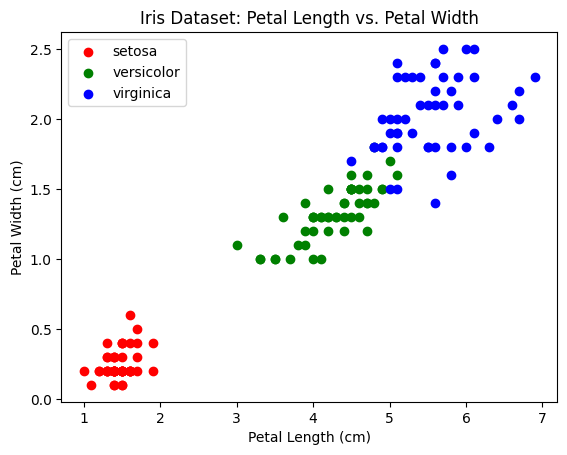

In [45]:
import matplotlib.pyplot as plt

# Map each species to a color
colors = ['red', 'green', 'blue']
target_names = iris.target_names


for i, color in zip([0, 1, 2], colors):
    plt.scatter(
        iris.data[iris.target == i, 2],
        iris.data[iris.target == i, 3],
        c=color, label=target_names[i]
    )

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs. Petal Width')
plt.legend()
plt.show()

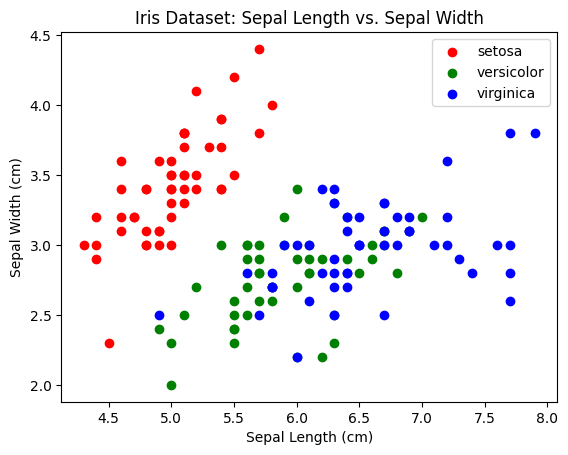

In [46]:
for i, color in zip([0, 1, 2], colors):
    plt.scatter(
        iris.data[iris.target == i, 0],
        iris.data[iris.target == i, 1],
        c=color, label=target_names[i]
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs. Sepal Width')
plt.legend()
plt.show()


Convert the problem to binary classification


In [47]:
from sklearn.model_selection import train_test_split

# remove setosa to make harder classification task
# and reveal more performance differences
X = iris.data[iris.target != 0]
Y = (iris.target[iris.target != 0] == 2).astype(int)  # 1 if Iris-Virginica, 0 non-Iris-Virginica.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Train the classifiers:
- Support Vector Machine (SVM)
- Logistic Regression
- K-Nearest Neighbors (KNN)


In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

svm = SVC(probability=True, random_state=42)
logistic = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

svm.fit(X_train, Y_train)
logistic.fit(X_train, Y_train)
knn.fit(X_train, Y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Create and train a voting classifier

In [49]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('svm', svm), ('log_reg', logistic), ('knn', knn)],
    voting='hard'
)

voting_clf.fit(X_train, Y_train)


,estimators,"[('svm', ...), ('log_reg', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


Evaluate classifiers


In [50]:
print(f'SVM accuracy score: {svm.score(X_test, Y_test)}')
print(f'Logistic Regression accuracy score: {logistic.score(X_test, Y_test)}')
print(f'KNN accuracy score: {knn.score(X_test, Y_test)}')
print(f'Voting Classifier accuracy score: {voting_clf.score(X_test, Y_test)}')

SVM accuracy score: 0.95
Logistic Regression accuracy score: 0.95
KNN accuracy score: 0.9
Voting Classifier accuracy score: 0.95


#### Exercise 2: Perceptron 

Train

In [51]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X_train, Y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


Evaluate the Perceptron's accuracy

In [52]:
perceptron_accuracy = perceptron_clf.score(X_test, Y_test)
print(f"Perceptron accuracy score: {perceptron_accuracy}")

Perceptron accuracy score: 0.9


Comparison:

The perceptron performs reasonably well with 90% accuracy, but not as good as the voting classifier with 95% accuracy since it achieves higher accuracy through the ability to combine multiple model types. 